# Quality Prediction in Mining Process main

#### imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import pickle

#### Reading csv
- will take raw values form csv
- convert all commas in decimal 

In [2]:
md=pd.read_csv(r'Mining_Dataset.csv', decimal=',',parse_dates=["date"],infer_datetime_format=True, sep=',')

##### Checking for null values

In [3]:
md.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

#### Saving all columns in col_a

In [4]:
col_a=md.columns
col_a

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

#### Removing all negative values

In [5]:
for cols in col_a.tolist()[1:]:
    df = md.loc[md[cols] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

In [6]:
df=df.set_index('date')

#### Plotting distribution

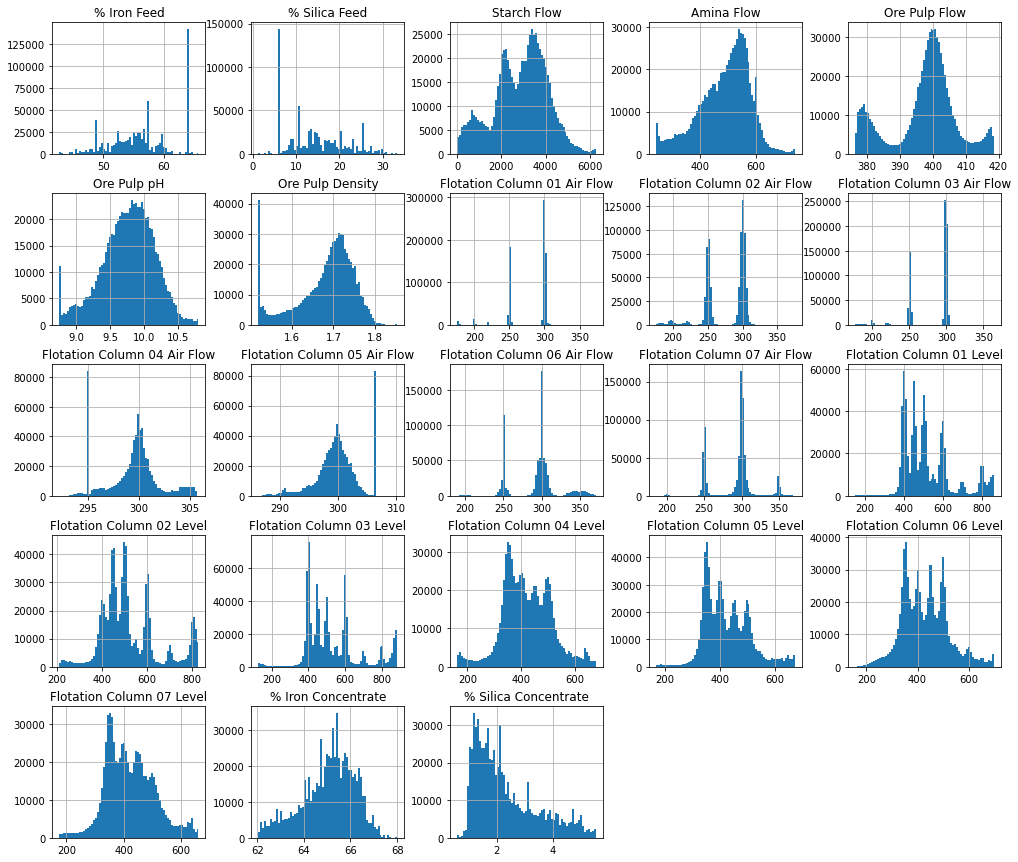

Text(0.5, 0.98, 'figure title')

<Figure size 432x288 with 0 Axes>

In [7]:
df.hist(bins = 70, figsize = (17,15))
plt.show()
plt.suptitle('figure title', color='w')

#### Removing outliers

In [8]:
df_copy=df
df_copy=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

#### Making correlation matrix

In [9]:
cor_matrix = df_copy.corr().abs()
cor_matrix

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
% Iron Feed,1.000000,0.971904,0.011367,0.114745,0.151876,0.011898,0.159031,0.090870,0.199076,0.079996,...,0.027861,0.043166,0.034615,0.033315,0.029626,0.038334,0.020021,0.039042,0.041392,0.060441
% Silica Feed,0.971904,1.000000,0.000541,0.105297,0.142555,0.027206,0.139750,0.125006,0.212935,0.105045,...,0.059373,0.053945,0.052499,0.041500,0.048969,0.060847,0.037227,0.062875,0.029224,0.053983
Starch Flow,0.011367,0.000541,1.000000,0.238315,0.029396,0.244051,0.206973,0.139012,0.141456,0.141857,...,0.160133,0.272592,0.256739,0.272049,0.019309,0.026772,0.037633,0.016600,0.050081,0.043997
Amina Flow,0.114745,0.105297,0.238315,1.000000,0.205013,0.102353,0.644208,0.073645,0.092472,0.074770,...,0.046667,0.267680,0.238059,0.269900,0.147807,0.190395,0.171055,0.151781,0.128767,0.184996
Ore Pulp Flow,0.151876,0.142555,0.029396,0.205013,1.000000,0.107597,0.008581,0.178047,0.146829,0.164571,...,0.167413,0.001564,0.001770,0.043244,0.003027,0.024220,0.007433,0.032460,0.074325,0.018504
Ore Pulp pH,0.011898,0.027206,0.244051,0.102353,0.107597,1.000000,0.089717,0.122481,0.115196,0.164784,...,0.148993,0.143794,0.126893,0.107877,0.073112,0.032062,0.048401,0.031358,0.175461,0.124634
Ore Pulp Density,0.159031,0.139750,0.206973,0.644208,0.008581,0.089717,1.000000,0.062713,0.012787,0.070647,...,0.105165,0.098332,0.082089,0.121713,0.049818,0.107672,0.063191,0.062250,0.004226,0.076765
Flotation Column 01 Air Flow,0.090870,0.125006,0.139012,0.073645,0.178047,0.122481,0.062713,1.000000,0.826089,0.961047,...,0.625475,0.386302,0.372005,0.295921,0.013924,0.019452,0.049603,0.048104,0.066605,0.189333
Flotation Column 02 Air Flow,0.199076,0.212935,0.141456,0.092472,0.146829,0.115196,0.012787,0.826089,1.000000,0.848126,...,0.544456,0.385669,0.383750,0.302179,0.009393,0.051811,0.059036,0.056857,0.033123,0.144872
Flotation Column 03 Air Flow,0.079996,0.105045,0.141857,0.074770,0.164571,0.164784,0.070647,0.961047,0.848126,1.000000,...,0.636937,0.389603,0.371603,0.301552,0.014712,0.013602,0.045580,0.033893,0.075976,0.192233


#### Keeping only upper traingle 
- as all the values in the diagonal are 1 and the values of upper and triangle are of same magnitude

In [10]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

<ipython-input-10-691bc3f52c96>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
% Iron Feed,NaN,0.971904,0.011367,0.114745,0.151876,0.011898,0.159031,0.090870,0.199076,0.079996,...,0.027861,0.043166,0.034615,0.033315,0.029626,0.038334,0.020021,0.039042,0.041392,0.060441
% Silica Feed,NaN,NaN,0.000541,0.105297,0.142555,0.027206,0.139750,0.125006,0.212935,0.105045,...,0.059373,0.053945,0.052499,0.041500,0.048969,0.060847,0.037227,0.062875,0.029224,0.053983
Starch Flow,NaN,NaN,NaN,0.238315,0.029396,0.244051,0.206973,0.139012,0.141456,0.141857,...,0.160133,0.272592,0.256739,0.272049,0.019309,0.026772,0.037633,0.016600,0.050081,0.043997
Amina Flow,NaN,NaN,NaN,NaN,0.205013,0.102353,0.644208,0.073645,0.092472,0.074770,...,0.046667,0.267680,0.238059,0.269900,0.147807,0.190395,0.171055,0.151781,0.128767,0.184996
Ore Pulp Flow,NaN,NaN,NaN,NaN,NaN,0.107597,0.008581,0.178047,0.146829,0.164571,...,0.167413,0.001564,0.001770,0.043244,0.003027,0.024220,0.007433,0.032460,0.074325,0.018504
Ore Pulp pH,NaN,NaN,NaN,NaN,NaN,NaN,0.089717,0.122481,0.115196,0.164784,...,0.148993,0.143794,0.126893,0.107877,0.073112,0.032062,0.048401,0.031358,0.175461,0.124634
Ore Pulp Density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062713,0.012787,0.070647,...,0.105165,0.098332,0.082089,0.121713,0.049818,0.107672,0.063191,0.062250,0.004226,0.076765
Flotation Column 01 Air Flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.826089,0.961047,...,0.625475,0.386302,0.372005,0.295921,0.013924,0.019452,0.049603,0.048104,0.066605,0.189333
Flotation Column 02 Air Flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.848126,...,0.544456,0.385669,0.383750,0.302179,0.009393,0.051811,0.059036,0.056857,0.033123,0.144872
Flotation Column 03 Air Flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.636937,0.389603,0.371603,0.301552,0.014712,0.013602,0.045580,0.033893,0.075976,0.192233


#### Removing highly corellated values 

In [11]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]

In [12]:
to_drop

['% Silica Feed',
 'Flotation Column 02 Air Flow',
 'Flotation Column 03 Air Flow',
 'Flotation Column 07 Air Flow',
 'Flotation Column 02 Level',
 'Flotation Column 03 Level',
 'Flotation Column 07 Level',
 '% Silica Concentrate']

In [13]:
df_copy=df_copy.drop(['% Silica Feed',
 'Flotation Column 02 Air Flow',
 'Flotation Column 03 Air Flow',
 'Flotation Column 07 Air Flow',
 'Flotation Column 02 Level',
 'Flotation Column 03 Level',
 'Flotation Column 07 Level',], axis=1)

In [14]:
df_copy

,% Iron Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 01 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.20,3019.53,557.434,395.713,10.06640,1.74000,249.214,295.096,306.400,250.225,457.396,443.558,502.255,446.370,66.91,1.31
2017-03-10 01:00:00,55.20,3024.41,563.965,397.383,10.06720,1.74000,249.719,295.096,306.400,250.137,451.891,448.086,496.363,445.922,66.91,1.31
2017-03-10 01:00:00,55.20,3043.46,568.054,399.668,10.06800,1.74000,249.741,295.096,306.400,251.345,451.240,449.688,484.411,447.826,66.91,1.31
2017-03-10 01:00:00,55.20,3047.36,568.665,397.939,10.06890,1.74000,249.917,295.096,306.400,250.422,452.441,446.210,471.411,437.690,66.91,1.31
2017-03-10 01:00:00,55.20,3033.69,558.167,400.254,10.06970,1.74000,250.203,295.096,306.400,249.983,452.441,453.670,462.598,443.682,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 23:00:00,49.75,2710.94,441.052,386.570,9.62129,1.65365,302.344,299.920,299.623,346.794,392.160,418.725,497.548,446.357,64.27,1.71
2017-09-09 23:00:00,49.75,2692.01,473.436,384.939,9.62063,1.65352,303.013,299.710,300.465,330.023,401.505,418.377,506.398,372.995,64.27,1.71
2017-09-09 23:00:00,49.75,2692.20,500.488,383.496,9.61874,1.65338,303.662,299.927,299.707,329.590,408.899,419.531,503.414,336.035,64.27,1.71


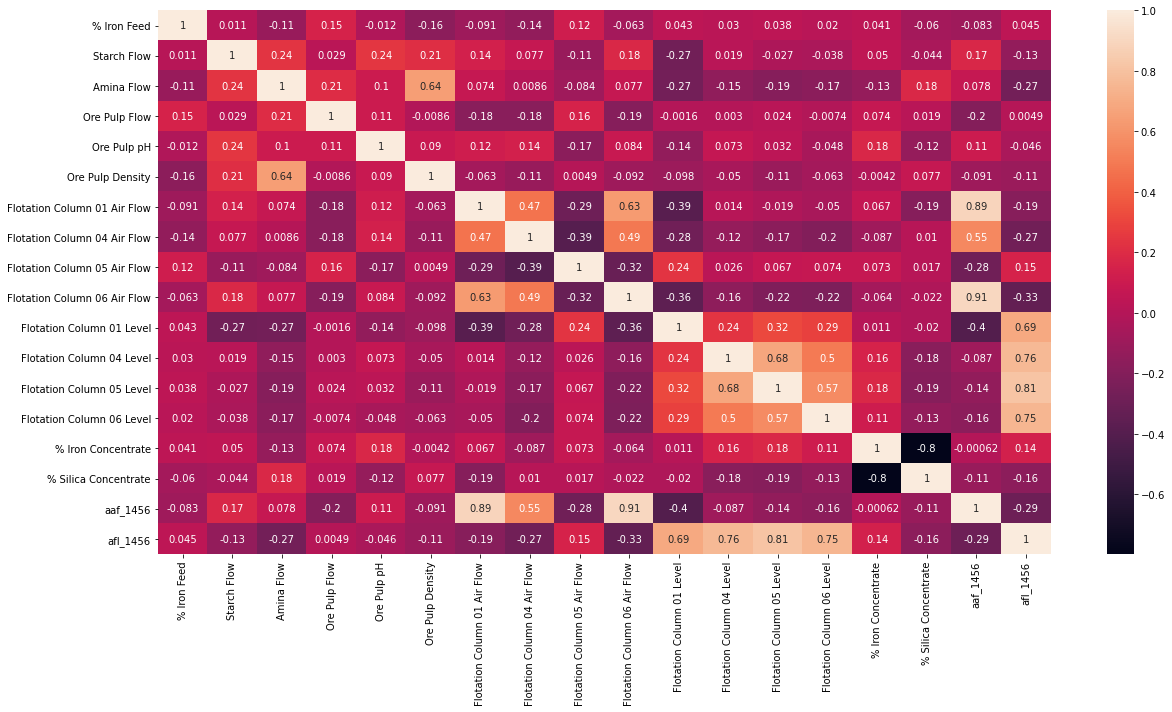

In [15]:
df_copy['aaf_1456'] = df_copy[['Flotation Column 01 Air Flow','Flotation Column 04 Air Flow','Flotation Column 05 Air Flow','Flotation Column 06 Air Flow']].mean(axis=1)
df_copy['afl_1456'] = df_copy[['Flotation Column 01 Level', 'Flotation Column 04 Level','Flotation Column 05 Level','Flotation Column 06 Level']].mean(axis=1)
plt.figure(figsize=(20, 10))
p = sns.heatmap(df_copy.corr(), annot=True);

In [16]:
df_copy=df_copy.drop(['Flotation Column 01 Air Flow','Flotation Column 04 Air Flow','Flotation Column 05 Air Flow','Flotation Column 06 Air Flow','Flotation Column 01 Level', 'Flotation Column 04 Level','Flotation Column 05 Level','Flotation Column 06 Level'], axis=1)

In [17]:
df_copy

,% Iron Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,% Iron Concentrate,% Silica Concentrate,aaf_1456,afl_1456
date,,,,,,,,,,
2017-03-10 01:00:00,55.20,3019.53,557.434,395.713,10.06640,1.74000,66.91,1.31,275.23375,462.39475
2017-03-10 01:00:00,55.20,3024.41,563.965,397.383,10.06720,1.74000,66.91,1.31,275.33800,460.56550
2017-03-10 01:00:00,55.20,3043.46,568.054,399.668,10.06800,1.74000,66.91,1.31,275.64550,458.29125
2017-03-10 01:00:00,55.20,3047.36,568.665,397.939,10.06890,1.74000,66.91,1.31,275.45875,451.93800
2017-03-10 01:00:00,55.20,3033.69,558.167,400.254,10.06970,1.74000,66.91,1.31,275.42050,453.09775
...,...,...,...,...,...,...,...,...,...,...
2017-09-09 23:00:00,49.75,2710.94,441.052,386.570,9.62129,1.65365,64.27,1.71,312.17025,438.69750
2017-09-09 23:00:00,49.75,2692.01,473.436,384.939,9.62063,1.65352,64.27,1.71,308.30275,424.81875
2017-09-09 23:00:00,49.75,2692.20,500.488,383.496,9.61874,1.65338,64.27,1.71,308.22150,416.96975


In [18]:
df_copy.drop(columns=['% Iron Concentrate'],inplace=True)

In [19]:
df_copy

,% Iron Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,% Silica Concentrate,aaf_1456,afl_1456
date,,,,,,,,,
2017-03-10 01:00:00,55.20,3019.53,557.434,395.713,10.06640,1.74000,1.31,275.23375,462.39475
2017-03-10 01:00:00,55.20,3024.41,563.965,397.383,10.06720,1.74000,1.31,275.33800,460.56550
2017-03-10 01:00:00,55.20,3043.46,568.054,399.668,10.06800,1.74000,1.31,275.64550,458.29125
2017-03-10 01:00:00,55.20,3047.36,568.665,397.939,10.06890,1.74000,1.31,275.45875,451.93800
2017-03-10 01:00:00,55.20,3033.69,558.167,400.254,10.06970,1.74000,1.31,275.42050,453.09775
...,...,...,...,...,...,...,...,...,...
2017-09-09 23:00:00,49.75,2710.94,441.052,386.570,9.62129,1.65365,1.71,312.17025,438.69750
2017-09-09 23:00:00,49.75,2692.01,473.436,384.939,9.62063,1.65352,1.71,308.30275,424.81875
2017-09-09 23:00:00,49.75,2692.20,500.488,383.496,9.61874,1.65338,1.71,308.22150,416.96975


In [20]:
df_copy

,% Iron Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,% Silica Concentrate,aaf_1456,afl_1456
date,,,,,,,,,
2017-03-10 01:00:00,55.20,3019.53,557.434,395.713,10.06640,1.74000,1.31,275.23375,462.39475
2017-03-10 01:00:00,55.20,3024.41,563.965,397.383,10.06720,1.74000,1.31,275.33800,460.56550
2017-03-10 01:00:00,55.20,3043.46,568.054,399.668,10.06800,1.74000,1.31,275.64550,458.29125
2017-03-10 01:00:00,55.20,3047.36,568.665,397.939,10.06890,1.74000,1.31,275.45875,451.93800
2017-03-10 01:00:00,55.20,3033.69,558.167,400.254,10.06970,1.74000,1.31,275.42050,453.09775
...,...,...,...,...,...,...,...,...,...
2017-09-09 23:00:00,49.75,2710.94,441.052,386.570,9.62129,1.65365,1.71,312.17025,438.69750
2017-09-09 23:00:00,49.75,2692.01,473.436,384.939,9.62063,1.65352,1.71,308.30275,424.81875
2017-09-09 23:00:00,49.75,2692.20,500.488,383.496,9.61874,1.65338,1.71,308.22150,416.96975


#### Splitting data in dependant and independant variables

In [21]:
y=df_copy.drop(['% Iron Feed','Starch Flow','Amina Flow','Ore Pulp Flow','Ore Pulp pH','Ore Pulp Density','aaf_1456','afl_1456'], axis=1)

In [22]:
y

,% Silica Concentrate
date,
2017-03-10 01:00:00,1.31
2017-03-10 01:00:00,1.31
2017-03-10 01:00:00,1.31
2017-03-10 01:00:00,1.31
2017-03-10 01:00:00,1.31
...,...
2017-09-09 23:00:00,1.71
2017-09-09 23:00:00,1.71
2017-09-09 23:00:00,1.71


In [23]:
x=df_copy.drop(['% Silica Concentrate'], axis=1)
x

,% Iron Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,aaf_1456,afl_1456
date,,,,,,,,
2017-03-10 01:00:00,55.20,3019.53,557.434,395.713,10.06640,1.74000,275.23375,462.39475
2017-03-10 01:00:00,55.20,3024.41,563.965,397.383,10.06720,1.74000,275.33800,460.56550
2017-03-10 01:00:00,55.20,3043.46,568.054,399.668,10.06800,1.74000,275.64550,458.29125
2017-03-10 01:00:00,55.20,3047.36,568.665,397.939,10.06890,1.74000,275.45875,451.93800
2017-03-10 01:00:00,55.20,3033.69,558.167,400.254,10.06970,1.74000,275.42050,453.09775
...,...,...,...,...,...,...,...,...
2017-09-09 23:00:00,49.75,2710.94,441.052,386.570,9.62129,1.65365,312.17025,438.69750
2017-09-09 23:00:00,49.75,2692.01,473.436,384.939,9.62063,1.65352,308.30275,424.81875
2017-09-09 23:00:00,49.75,2692.20,500.488,383.496,9.61874,1.65338,308.22150,416.96975


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
model=RandomForestRegressor(n_estimators=42,criterion='mse')
model.fit(x_train,y_train)

<ipython-input-25-9d72a7121892>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestRegressor(n_estimators=42)

In [26]:
y_pred=model.predict(x_test)
y_pred

array([1.82857143, 1.26      , 4.22216309, ..., 4.34925531, 1.09      ,
       1.07619048])

In [27]:
r2_score(y_test,y_pred)

0.9502979067184666

In [28]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rmse

0.24833201809608352

In [29]:
pickle.dump(model,open('mining.pkl','wb'))

In [30]:
model.predict([[55.20,3033.69,558.167,400.254,10.06970,1.74000,275.42050,453.09775]])

array([1.32547619])